In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import data,color,io,img_as_ubyte
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label,regionprops
from skimage.morphology import closing,square

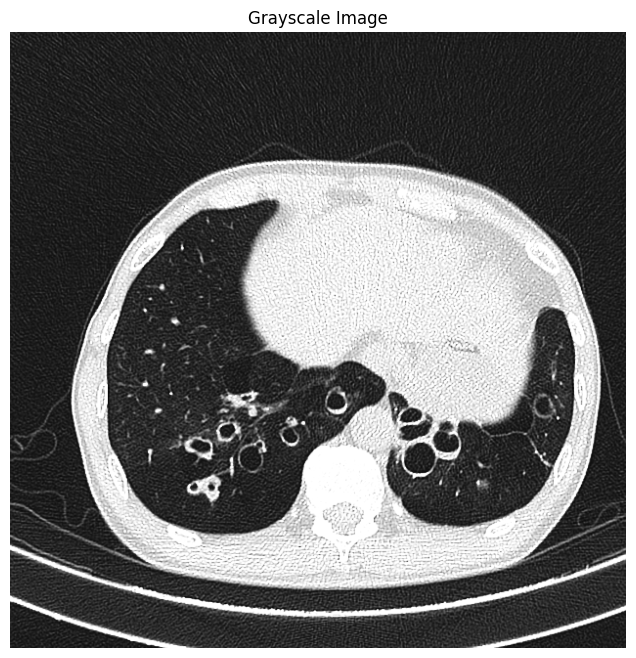

In [28]:
from skimage import io, color
import matplotlib.pyplot as plt

# Load the image
image = io.imread("E:/126156163/jan 22/lung window(image analysis).jpeg")

gray_image_3ch=np.stack((image,)*3,axis=-1)
gray_image=color.rgb2gray(gray_image_3ch)

# Display the grayscale image
plt.figure(figsize=(10, 8))
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

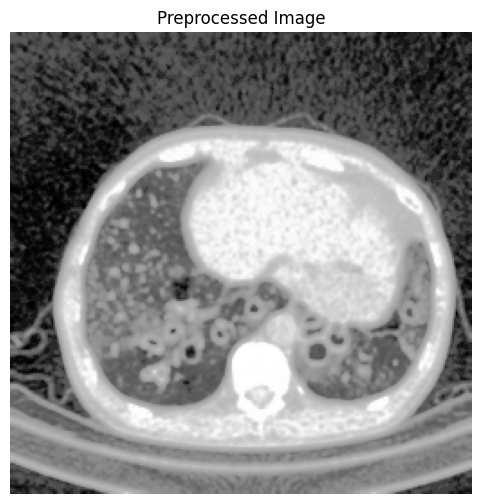

In [30]:
# Resize the image
resized_image = cv2.resize(gray_image, (256, 256))
# Denoise the image
denoised_image = cv2.GaussianBlur(resized_image, (5, 5), 0)
# Adjust the contrast (if necessary)
contrast_image = cv2.equalizeHist(img_as_ubyte(denoised_image))
# Display the preprocessed image
plt.figure(figsize=(6, 6))
plt.imshow(contrast_image, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()


C:\Users\DSL-189\AppData\Local\Temp\ipykernel_7120\495025126.py:3: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  binary_image = closing(contrast_image > thresh, square(3))


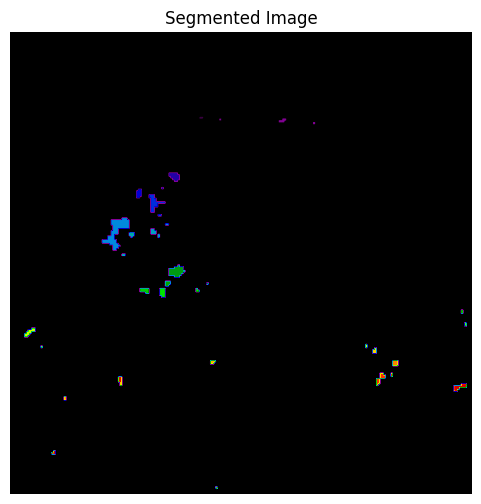

In [31]:
# Apply thresholding
thresh = threshold_otsu(contrast_image)
binary_image = closing(contrast_image > thresh, square(3))

# Remove artifacts connected to image border
cleared = clear_border(binary_image)

# Label image regions
label_image = label(cleared)

# Display the segmented image
plt.figure(figsize=(6, 6))
plt.imshow(label_image, cmap='nipy_spectral')
plt.title('Segmented Image')
plt.axis('off')
plt.show()


Region 10: Area=102.0, Perimeter=59.59188309203678


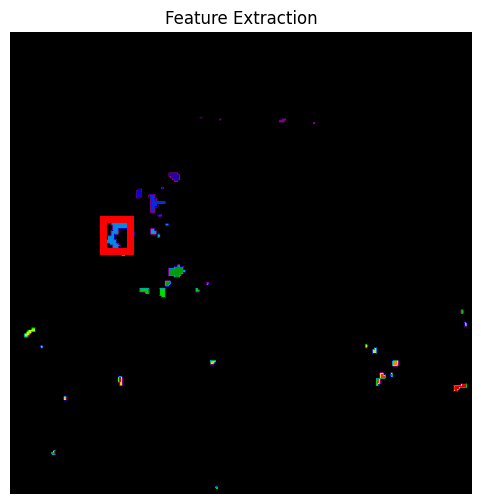

In [32]:
# Extract region properties
regions = regionprops(label_image)

# Display properties of regions
for region in regions:
    # Take regions with large enough areas
      if region.area >= 100:
        print(f'Region {region.label}: Area={region.area}, Perimeter={region.perimeter}')
# Display the regions
plt.figure(figsize=(6, 6))
plt.imshow(label_image, cmap='nipy_spectral')
for region in regions:
    if region.area >= 100:
        # Draw rectangle around segmented regions
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,fill=False, edgecolor='red', linewidth=5)
        plt.gca().add_patch(rect)
plt.title('Feature Extraction')
plt.axis('off')
plt.show()


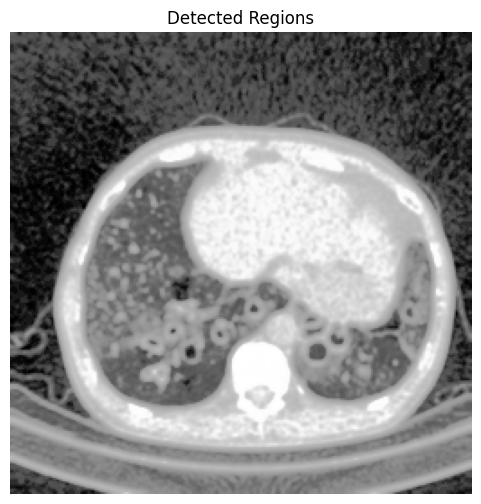

In [22]:
# Detect specific features (e.g., regions with area > 200)
for region in regions:
    if region.area > 200:
        print(f'Detected Region {region.label}: Area={region.area}, Perimeter={region.perimeter}')
        minr, minc, maxr, maxc = region.bbox
        cv2.rectangle(contrast_image, (minc, minr), (maxc, maxr), (255, 0, 0), 2)

# Display the detected regions
plt.figure(figsize=(6, 6))
plt.imshow(contrast_image, cmap='gray')
plt.title('Detected Regions')
plt.axis('off')
plt.show()
